In [1]:
import numpy as np
import matplotlib.pyplot as plt
# import cooperpairbox as cpb
import qutip as qt

In [2]:
def purcell_rate(kappa, g, delta, ratio=1):
    return ratio*kappa*(g/delta)**2

In [3]:
# Testing whether detuned frame works


wq = 2*np.pi * 5000

delta = 2* np.pi * 1300
wr = wq + delta
# qt = wr-delta
g = 2* np.pi* 60

kappa = 2*np.pi*2  # cavity dissipation rate
gamma = 0.0    # atom dissipation rate
Gamma = 0.0    # atomic pump rate

print(1/(purcell_rate(kappa, g, delta, ratio=1)*1e6)*1e6)


N = 20
n_th_a = 0.0

tlist = np.linspace(0, 100, 101)

37.357201920181


In [11]:
psi0_bare = qt.tensor(qt.basis(N,0), qt.basis(2,1))   # Initial state resonator in vacuum qubit in excited



a = qt.tensor(qt.destroy(N), qt.qeye(2))
sm = qt.tensor(qt.qeye(N), qt.destroy(2))
V = delta*sm.dag()*sm + g*(a.dag()*sm + a*sm.dag())
_, states = V.eigenstates()

for i, state in enumerate(states):
    if qt.fidelity(psi0_bare, state)>0:
        print(i)
# print(qt.fidelity(psi0_bare, states[18]))
# print(qt.fidelity(psi0_bare, states[21]))


# V = wr*a.dag()*a + wq*sm.dag()*sm + g*(a.dag()*sm + a*sm.dag())

18
21
0.04600717869001153
0.9989411091295549


In [12]:
# collapse operators
c_ops = []

rate = kappa * (1 + n_th_a)
if rate > 0.0:
    c_ops.append(np.sqrt(rate) * a)

rate = kappa * n_th_a
if rate > 0.0:
    c_ops.append(np.sqrt(rate) * a.dag())

rate = gamma
if rate > 0.0:
    c_ops.append(np.sqrt(rate) * sm)

rate = Gamma
if rate > 0.0:
    c_ops.append(np.sqrt(rate) * sm.dag())

In [15]:
opt = qt.Options(nsteps=50000)
output = qt.mesolve(V, states[21], tlist, c_ops, [a.dag()*a, sm.dag()*sm], options=opt)

Text(0, 0.5, 'Occupation probability')

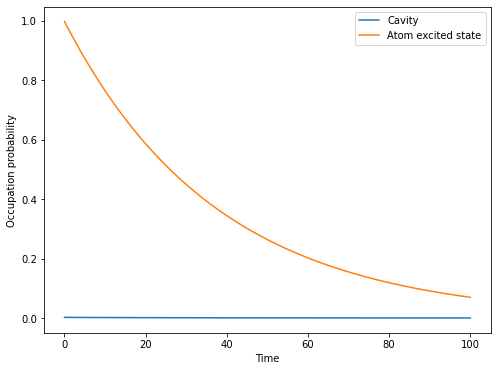

In [16]:
n_c = output.expect[0]
n_a = output.expect[1]

fig, axes = plt.subplots(1, 1, figsize=(8, 6))

axes.plot(tlist, n_c, label="Cavity")
axes.plot(tlist, n_a, label="Atom excited state")
# axes.set_xlim(0, 150)
axes.legend(loc=0)
axes.set_xlabel("Time")
axes.set_ylabel("Occupation probability")

In [222]:
import lmfit as lm

In [223]:
exp_decay = lm.models.ExponentialModel()

In [224]:
params = exp_decay.guess(n_a, tlist)
print(params)

Parameters([('amplitude', <Parameter 'amplitude', value=0.9959213435587602, bounds=[-inf:inf]>), ('decay', <Parameter 'decay', value=37.592590792166845, bounds=[-inf:inf]>)])


In [225]:
res = exp_decay.fit(n_a, params, x=tlist)

[[Model]]
    Model(exponential)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 101
    # variables        = 2
    chi-square         = 1.6354e-05
    reduced chi-square = 1.6519e-07
    Akaike info crit   = -1575.25046
    Bayesian info crit = -1570.02022
[[Variables]]
    amplitude:  0.99619862 +/- 1.3249e-04 (0.01%) (init = 0.9959213)
    decay:      37.5781728 +/- 0.00752437 (0.02%) (init = 37.59259)
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, decay) = -0.714


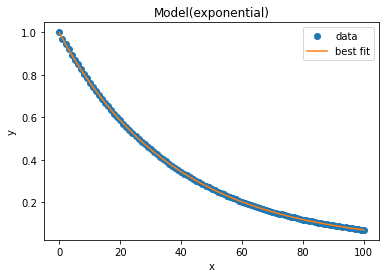

In [226]:
res.plot_fit()
print(res.fit_report())